In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:40
🔁 Restarting kernel...


In [ ]:
! pip install lazypredict

In [ ]:
import pandas as pd
from sklearn import preprocessing

Embedding_DT_label = pd.read_csv('drive/MyDrive/Graph EdgeList/Embedding_DT_label_11000_64Feature.csv')
Embedding_DT_label = Embedding_DT_label.dropna()

In [ ]:
import sklearn; sklearn.show_versions()

In [ ]:
Embedding_DT_label.head(-5)

,Drug ID,Target ID,Label,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,F61,F62,F63,F64
0,DB00001,P00734,1,-1.217786,0.378256,0.698677,1.751529,-0.037921,0.415056,-0.485328,1.272790,0.591778,-0.888737,-1.027185,-1.987029,0.965209,1.315725,-1.319818,0.618605,0.967267,-0.615530,-0.212340,0.240300,-0.957754,0.358908,0.908240,-1.131793,0.189011,-0.491967,-0.440092,0.864794,-0.705921,1.268600,0.629728,0.368887,0.596039,1.860186,-0.321554,0.437613,-1.028291,0.579440,1.142120,0.329447,0.111296,0.760518,0.642148,0.397582,1.547480,-0.250366,-0.460853,-0.043976,-1.461597,0.374082,0.434086,-0.957438,-0.332655,1.427434,2.165016,1.345683,-0.018269,-0.309531,-0.453451,0.246359,-1.201472,-0.581831,0.251975,-0.710576
1,DB00002,P00533,1,0.648152,0.390961,0.222547,0.373779,-1.156678,0.359685,0.073429,1.295985,-1.459507,1.483538,-0.688193,2.197794,0.742324,0.798159,-0.573942,-0.873702,0.691244,-0.260745,-0.471969,0.051384,0.183484,0.873886,-0.784499,-0.713810,-0.642116,0.245439,0.546441,-0.644641,-0.433974,-1.125709,0.952148,1.300787,-1.240088,0.284635,-0.049898,0.468752,1.330779,0.457026,0.464810,0.178013,0.531011,0.292033,1.297247,0.062581,-0.535533,-0.449672,-2.214826,-0.391433,0.130084,1.209832,0.241350,1.507714,0.343212,0.138595,0.541746,0.789041,0.519502,-0.980149,0.626733,-0.350040,0.306906,-0.295778,-0.602324,0.856851
2,DB00002,O75015,1,0.358170,1.082837,0.511295,-0.352674,-1.316676,0.340566,-0.296822,2.269197,0.426798,1.515130,-1.031990,1.088681,1.941044,1.252035,-0.334330,-0.589883,1.066547,-1.501395,0.627518,0.374385,0.693581,1.220635,-0.187403,-0.543120,0.193257,-0.268322,0.056391,-1.272373,-1.319710,-2.824247,1.329972,2.403238,-1.167252,0.247477,-0.166842,-0.001084,1.324699,1.307873,0.216169,-0.573120,-0.419429,0.188092,1.093543,0.846485,-1.245692,-0.466440,-1.872275,0.108079,-0.033260,1.232308,-0.267434,0.813787,0.266467,0.256560,1.605645,0.786444,1.001873,-0.930362,-0.075718,0.444748,-0.365249,0.248512,-0.285290,0.877249
3,DB00002,P02745,1,0.293993,1.047876,0.473940,-0.961737,-1.112729,0.094836,0.011162,2.130513,-0.026086,1.914564,-1.080309,1.669392,2.333219,1.051460,0.042632,-0.630490,1.407062,-1.416507,0.939928,0.646612,0.853872,1.861553,-0.622253,-0.543009,-0.016107,-0.284430,0.224380,-1.679317,-1.771496,-1.750010,1.150163,1.982100,-0.450728,0.533144,-0.527731,0.024697,1.590564,1.293855,-0.394317,-0.276451,-0.713536,0.795887,1.316806,0.539630,-0.351549,-0.426680,-1.891991,-0.633446,0.151016,1.026000,-0.699747,0.984124,0.841034,-0.105650,1.765294,1.127378,0.651434,-0.197828,0.129433,0.477084,0.184170,0.098055,-0.364112,0.630863
4,DB00002,P02746,1,0.095389,0.923703,0.418403,-0.299447,-0.490171,0.464269,0.482566,1.852560,-0.189535,1.932169,-0.971075,1.177750,1.947225,0.680946,0.134628,-0.954644,0.899323,-1.594825,0.339024,0.072039,1.127319,1.866261,-0.502087,-0.280141,-0.129898,-0.662575,0.578693,-1.101126,-2.131579,-1.594313,1.079803,1.247589,-0.603913,0.436105,-0.030480,-0.186765,0.879212,1.079411,0.012803,-0.200793,0.067877,0.445334,1.119573,0.657920,-0.232548,0.012467,-1.920812,-0.666098,0.014081,0.850271,-0.170800,0.863038,0.584641,0.304442,1.562473,1.306523,0.983234,-0.770081,0.034218,0.405968,0.173748,0.093227,-0.432726,0.540630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22048,DB01621,P24024,-1,-0.850574,-1.850052,-0.969218,0.115276,0.090584,-0.432322,-0.309347,0.208837,0.227392,0.233711,-0.265583,1.037599,-0.645470,-0.000989,0.042124,-0.325794,0.872067,-0.918577,-0.994268,1.171711,0.774600,0.254273,1.052169,-0.076236,0.648392,0.375111,0.388447,0.620596,1.149126,0.559644,0.364530,-0.793265,0.169673,0.580175,0.573576,-0

In [ ]:
train_data = Embedding_DT_label.iloc[:,3:].values

In [ ]:
train_data

array([[-1.21778637,  0.37825616,  0.69867696, ..., -0.58183132,
         0.25197507, -0.71057642],
       [ 0.64815229,  0.39096148,  0.22254677, ..., -0.29577777,
        -0.60232426,  0.8568511 ],
       [ 0.35816988,  1.08283675,  0.51129478, ...,  0.24851214,
        -0.28529033,  0.87724936],
       ...,
       [-0.28788197, -0.83545183, -0.74105674, ..., -0.31959863,
        -1.94778812, -0.08711538],
       [-1.12353966, -0.1160894 ,  1.10131037, ..., -0.47389092,
        -1.17385313,  0.08383192],
       [-1.12722818,  0.89655762, -1.60381445, ..., -1.51645723,
         0.54434662,  0.4115901 ]])

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
train_scaled = min_max_scaler.fit_transform(train_data)
train_data = train_scaled

print("Number of samples: %d, Number of features: %d" % (train_data.shape[0], train_data.shape[1]))

Number of samples: 22058, Number of features: 64


In [ ]:
train = pd.DataFrame(train_data)

train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.326899,0.592927,0.553657,0.777709,0.532065,0.612478,0.475724,0.577740,0.660165,0.363669,0.322574,0.193799,0.670502,0.694551,0.306360,0.615672,0.638840,0.402414,0.484422,0.616273,0.389806,0.535354,0.613801,0.366031,0.509371,0.511039,0.436217,0.600952,0.454306,0.675068,0.536287,0.455940,0.668577,0.763499,0.519608,0.523694,0.387400,0.607095,0.602296,0.477237,0.603957,0.618562,0.607480,0.547627,0.732210,0.483090,0.386637,0.544506,0.245894,0.590836,0.553401,0.257164,0.417270,0.706410,0.818430,0.792414,0.516446,0.471461,0.436195,0.497675,0.340524,0.496574,0.518318,0.418731
1,0.570303,0.595081,0.491468,0.564319,0.376845,0.603673,0.550183,0.581300,0.324267,0.742880,0.379680,0.815775,0.639263,0.623642,0.421065,0.379551,0.599474,0.451086,0.452618,0.587109,0.553408,0.610340,0.377114,0.423820,0.385460,0.600874,0.564298,0.400940,0.494052,0.423524,0.578275,0.581957,0.416004,0.580435,0.555527,0.527994,0.688997,0.590657,0.520385,0.457890,0.663113,0.545388,0.720961,0.497613,0.424166,0.453924,0.107504,0.496533,0.495780,0.697773,0.525851,0.678172,0.504767,0.529386,0.584237,0.718530,0.594073,0.369595,0.607508,0.416223,0.539417,0.538380,0.404619,0.620762
2,0.532476,0.712400,0.529183,0.451804,0.354646,0.600633,0.500844,0.730664,0.633149,0.747930,0.321764,0.650932,0.807272,0.685825,0.457913,0.424458,0.652999,0.280885,0.587303,0.636973,0.626533,0.660830,0.460603,0.447419,0.510004,0.538284,0.500675,0.317761,0.364601,0.245078,0.627478,0.731037,0.426023,0.576118,0.540065,0.463108,0.688219,0.704914,0.490315,0.361923,0.529156,0.529153,0.685674,0.614647,0.319144,0.451470,0.162018,0.565500,0.470136,0.700649,0.453126,0.559660,0.494831,0.545588,0.737728,0.718185,0.663703,0.377157,0.496102,0.524769,0.450788,0.617928,0.446813,0.623392
3,0.524104,0.706472,0.524304,0.357471,0.382943,0.561559,0.541885,0.709379,0.558989,0.811780,0.313624,0.737241,0.862238,0.658345,0.515884,0.418033,0.701563,0.292531,0.625573,0.678999,0.649511,0.754153,0.399800,0.447434,0.478791,0.536322,0.522485,0.263838,0.298572,0.357936,0.604062,0.674088,0.524587,0.609310,0.492347,0.466668,0.722209,0.703031,0.416486,0.399826,0.487704,0.624086,0.724349,0.568835,0.451374,0.457288,0.158881,0.463118,0.499066,0.674251,0.391331,0.588751,0.569214,0.495838,0.760761,0.763438,0.613117,0.488428,0.528638,0.529185,0.523233,0.595938,0.436323,0.591634
4,0.498197,0.685417,0.517050,0.460048,0.469318,0.620304,0.604703,0.666720,0.532225,0.814594,0.332026,0.664170,0.808138,0.607583,0.530032,0.366744,0.629150,0.268067,0.551963,0.590297,0.688711,0.754839,0.416603,0.483777,0.461826,0.490254,0.568485,0.340453,0.245946,0.374293,0.594899,0.574764,0.503515,0.598035,0.558095,0.437465,0.631266,0.674235,0.465721,0.409492,0.597838,0.569332,0.690183,0.586495,0.468972,0.521554,0.154294,0.458610,0.477568,0.651766,0.466938,0.568072,0.536022,0.552165,0.731500,0.787216,0.661012,0.401504,0.513538,0.519473,0.521859,0.595233,0.427191,0.580004


In [ ]:
 from sklearn import svm
 from sklearn.model_selection import train_test_split

 X_train, X_test, y_train, y_test = train_test_split(train_data, Embedding_DT_label['Label'], test_size=0.3,random_state=109)


In [ ]:
len(X_test)

7352

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(15440, 64)
(6618, 64)
(15440,)
(6618,)


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [06:35<00:00, 13.65s/it]


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [06:03<00:00, 12.52s/it]


In [ ]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
SVC,0.95,0.95,0.95,0.95,0.91,18.53
ExtraTreesClassifier,0.94,0.94,0.94,0.93,0.87,3.00
RandomForestClassifier,0.93,0.93,0.93,0.93,0.87,16.15
LGBMClassifier,0.93,0.93,0.93,0.93,0.85,2.40
XGBClassifier,0.92,0.92,0.92,0.92,0.85,12.50
NuSVC,0.91,0.91,0.91,0.91,0.83,41.16
KNeighborsClassifier,0.88,0.88,0.88,0.88,0.77,17.66
BaggingClassifier,0.88,0.88,0.88,0.88,0.75,14.35
DecisionTreeClassifier,0.79,0.79,0.79,0.79,0.58,2.59


[(0.0, 1.0)]

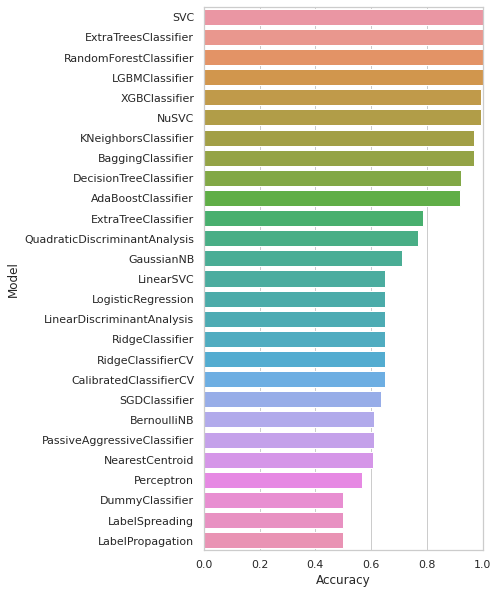

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_test.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7699945593035908

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Hyperparameters
kernel = 'rbf'

svm_cl = SVC(kernel=kernel)

In [ ]:
svm_cl.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test

array([[0.58636714, 0.41280962, 0.43485951, ..., 0.3419004 , 0.50947859,
        0.42170763],
       [0.57327077, 0.57631468, 0.42135154, ..., 0.52821667, 0.23912068,
        0.44745287],
       [0.44936509, 0.52667017, 0.51423915, ..., 0.70710491, 0.3944652 ,
        0.39555932],
       ...,
       [0.6756875 , 0.41020262, 0.54906514, ..., 0.58578018, 0.55529852,
        0.50310858],
       [0.53981581, 0.75749202, 0.55946995, ..., 0.85988609, 0.40384695,
        0.43245249],
       [0.51282166, 0.54777896, 0.37102209, ..., 0.67351999, 0.59631524,
        0.56450909]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred=svm_cl.predict(X_test)

In [ ]:
predict=pd.read_csv('drive/MyDrive/prediction.csv')
predict

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0,-0.609343,-0.546567,0.476734,0.996206,0.038573,-1.939316,1.379879,0.059968,-2.042846,-1.682672,-0.407242,-0.235234,-1.093885,-0.665203,0.778376,2.106437,-0.026552,-0.186844,0.553463,0.429060,-1.146502,0.019899,-0.293605,-0.964926,-0.010228,-0.554945,0.366105,0.483759,-0.268151,-0.803195,0.558249,1.190463,0.899040,-0.701951,0.472999,0.940840,1.241505,0.867929,2.212852,0.789764,0.152453,0.240728,0.335580,-2.337389,-0.580485,1.549252,0.990295,1.482480,-0.823931,-1.531852,-1.327551,-0.500939,1.150118,0.246387,1.061762,1.431195,-0.022234,0.316615,2.045603,0.229862,-0.875472,-0.548062,2.002886,-1.294058
1,1,-0.063325,-0.878618,0.491814,1.801576,-0.220358,-1.724464,1.268241,-0.169639,-2.585562,-1.228925,-0.905847,-0.131036,-0.991938,-0.264080,0.938841,2.697475,0.364242,-0.894852,0.817136,0.802949,-1.006390,-0.442568,-0.313334,-1.332555,0.231240,-0.658055,-0.011502,0.184744,0.189495,-0.224043,0.863557,1.059498,1.563057,-0.661581,-0.090483,0.595375,1.808587,1.180331,2.143445,0.421764,0.689436,0.599064,0.282089,-2.597424,-0.176502,1.954098,1.298360,1.035779,-1.376791,-1.443977,-1.455714,-0.530461,1.615250,0.838995,1.198126,1.437362,0.129502,0.898193,1.609899,0.771058,-1.150154,-0.983378,2.446203,-0.632024
2,2,0.093761,-0.532347,0.622619,0.744026,-0.525915,-1.299028,1.031046,0.220999,-2.575945,-1.345894,-0.203883,-0.262679,-0.990420,-0.806959,0.900907,2.354744,0.167199,-0.654289,0.328280,0.153380,-1.693388,0.262846,-0.055775,-1.255412,-0.436632,0.007861,-0.115512,1.068604,0.370013,-1.130655,1.118841,2.350471,0.549236,-0.609542,0.806218,0.681591,0.972420,0.502629,1.625565,0.360144,0.673580,0.134096,0.930613,-2.568133,0.196808,1.983528,0.714726,1.554647,-1.016827,-1.020673,-1.699354,-0.585255,1.083556,0.705290,1.998825,1.085300,-0.117041,0.981004,1.093352,-0.033354,-1.353025,-1.233633,1.135250,-1.126540
3,3,-0.642494,-0.413941,0.616981,0.683540,-0.091872,-1.996170,1.178803,0.246121,-2.382429,-1.420856,-0.314801,-0.258467,-1.409601,-0.624830,0.740380,1.909782,0.265437,-0.475971,0.874426,0.546592,-1.436644,0.132454,-0.546326,-0.995799,-0.030333,-0.385720,-0.161891,0.720389,0.138744,-0.798347,0.831707,1.194278,0.633641,-0.588080,0.459699,0.865975,1.174628,0.599687,1.816582,0.430741,0.700998,0.097705,0.185877,-2.144646,0.020847,1.654112,0.652870,1.279923,-0.666563,-1.432702,-1.334028,-0.665569,1.286610,0.527068,1.561060,1.515519,-0.059943,0.324025,1.484977,0.111901,-0.754085,-0.314347,1.832748,-1.177357
4,4,-0.343576,-0.427431,0.417130,1.001231,0.036239,-1.957482,1.444523,-0.015141,-2.040746,-1.298389,-0.454793,-0.634467,-1.550790,-0.665223,0.391992,2.015105,0.225607,-0.328367,0.875875,0.142241,-1.644356,-0.174759,-0.481186,-0.933979,-0.348752,-0.460286,0.100044,0.704545,0.114067,-0.880681,0.906614,0.953617,0.931453,-0.658227,0.240582,0.559683,1.202816,0.742000,1.599462,0.191099,0.354856,-0.390693,0.389525,-2.234054,-0.103684,1.449718,0.758381,1.341868,-0.460250,-1.585223,-1.192552,-0.581894,0.957296,0.180276,1.149163,1.907329,-0.144853,0.000391,2.043959,0.118329,-0.461971,-0.368963,1.436889,-1.154137
5,5,-0.532153,-0.546371,0.531890,0.954545,-0.266214,-2.152157,1.097726,0.223130,-2.430056,-1.485396,-0.087410,-0.300422,-1.349431,-0.751808,0.844611,1.686789,0.592040,-0.485203,0.781873,0.792448,-1.131372,-0.241412,-0.505550,-0.884481,-0.193448,-0.792863,-0.372030,0.311750,-0.247668,-0.417326,0.679304,1.340695,0.625131,-0.799995,0.379816,0.975007,1.489876,0.763848,1.690375,0.531379,0.589524,0.150732,0.187233,-1.919009,0.094763,1.723586,0.514156,1.013187,-0.648019,-1.518252,-1.037638,-0.476681,1.143294,0.799915,1.330770,1.325692,-0.154064,0.182077,1.787244,0.211440,-0.636863,-0.398142,2.227644,-1.018882
6,6,0.060028,-0.551291,0.089348,0.888012,-0.412958,-2.096972,1.727902,0.027895,-2.638569,-1.420163,-0.403641,-1.052505,-1.361986,-0.987042,0.498845,2.08

In [ ]:
predict = predict.iloc[: , 1:]

In [ ]:
pred=svm_cl.predict(predict)

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred[7351]

-1

In [ ]:
print("Accuracy: ", (accuracy_score(y_test, y_pred) * 100))

Accuracy:  94.89271683288003


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.93      0.95      3266
           1       0.94      0.96      0.95      3352

    accuracy                           0.95      6618
   macro avg       0.95      0.95      0.95      6618
weighted avg       0.95      0.95      0.95      6618



In [ ]:
import pickle
pickle.dump(svm_cl,open('drive/MyDrive/svm_model.pkl','wb'))